In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google

In [3]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#verificando a existência de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#adicinando valores nulos
customers_null=customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

In [13]:
#verificando as colunas nulas
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [14]:
#analisando o dataset
customers_null.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,NaN,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
7,NaN,Female,23.0,18.0,94.0
8,9.0,Male,64.0,19.0,3.0
9,10.0,Female,30.0,19.0,72.0


In [15]:
#verificando campos nulos
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [16]:
#deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,Female,22.0,17.0,76.0
...,...,...,...,...,...
188,189.0,Female,41.0,103.0,17.0
190,191.0,Female,34.0,103.0,23.0
193,194.0,Female,38.0,113.0,91.0
196,197.0,Female,45.0,126.0,28.0


In [18]:
#preenchendo os valores nan com o valor 0
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,0.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,0.0,Female,0.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,0.0
198,199.0,Male,32.0,137.0,18.0


In [19]:
#verificando as estatísticas do dataset
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,99.861111,38.450000,60.394444,50.183333
std,57.697706,13.912847,26.498761,25.809893
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,40.000000,35.000000
50%,99.500000,35.500000,60.500000,50.000000
75%,149.250000,49.000000,78.000000,72.250000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
#preenchendo os valores médios da coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.00,15.000000,39.000000
1,2.000000,Male,21.00,60.394444,81.000000
2,3.000000,Female,20.00,16.000000,6.000000
3,4.000000,Female,23.00,16.000000,77.000000
4,5.000000,Female,31.00,17.000000,40.000000
...,...,...,...,...,...
195,99.861111,Female,38.45,120.000000,79.000000
196,197.000000,Female,45.00,126.000000,28.000000
197,198.000000,Male,32.00,126.000000,50.183333
198,199.000000,Male,32.00,137.000000,18.000000


In [21]:
#analisando o banco de dados, função que retorna uma análise superficial dos dados
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,99.861111,38.450000,60.394444,50.183333
std,57.697706,13.912847,26.498761,25.809893
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,40.000000,35.000000
50%,99.500000,35.500000,60.500000,50.000000
75%,149.250000,49.000000,78.000000,72.250000
max,200.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presente na coluna
* **min** = menor valor existente na coluna
* **25%** primeiro quartil dos dados(25%)
* **50%** = segundo quartil dos dados(50%)
* **75%** = terceiro quartil dos dados(75%)
* **max** = valor máximo existente na coluna

**Verificando se existem outliers nos dados. Para isso, será usado o boxplot.**

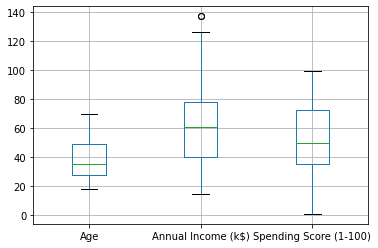

In [23]:
#Constroi o boxplot para as colunas desejadas
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

**Verificando se existem outliers nos dados. Para isso, será usado o Z-Score.**

In [25]:
#Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshould = 2
result=np.where(z > threshould)

df_salario_outlier=customers.iloc[result[0]]
#print(z)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [26]:
#todos os usúarios com salários anual com possível outlier
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


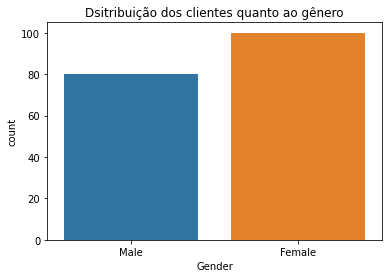

In [29]:
#analisando a distribuição dos clientes por gênero
sns.countplot(x='Gender', data=customers)# cria o gráfico que conta quantidade de consumidores ecistente em cada um dos gêneros
plt.title('Dsitribuição dos clientes quanto ao gênero'); #adiciona o titulo no gráfico

**Distribuição dos consumidores pela idade**

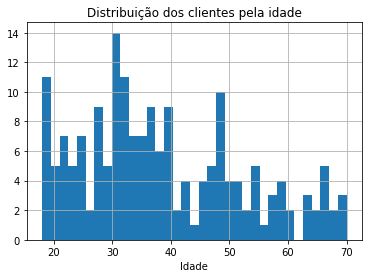

In [30]:
#analisando a distribuição dos clientes quanto a idade através do histograma
customers.hist('Age', bins=35); #seleciona a coluna idade para realizar o histograma os "bins"indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pela idade'); #adiciona o titulo ao gráfico (histograma)
plt.xlabel('Idade');

**Aplicando a codificação aos dados**

In [32]:
cat_df_customers = customers.select_dtypes(include=['object']) #copiando as clolunas que são do tipo categorias

In [33]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


**Aplicando o Mapeamento**

In [35]:
replace_map = {'Gender': {'Male': 1, 'Female': 2}} #define o dicionário a ser utilizado (map)
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() #encontra a lista das variáveis categóricas
replace_map_comp = {'Gender' : {k: v for k, v in zip(labels,list(range(1, len(labels)+1)))}} #define o pmapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [36]:
cat_df_customers_replace =pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')  #realiza a cópia do dataset

In [37]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True) #aplica o mapeamento para o dataset
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


**Aplicando o Label Encodering**

In [39]:
#cat_df_customers_lc = customers
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [42]:
cat_df_customers_lc=customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [44]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [50]:
# importando o label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #instanciando o objeto

In [51]:
# aplicando a codificação para as colunas categóricas
customers_label=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] =  le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


**One Hot Encoding**

In [52]:
# Get dummies
customers_one_hot=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#customers_one_hot['Gender']=pd.Categorical(customers_one_hot['Gender'])
customers_one_hot= pd.get_dummies(customers_one_hot)
# customers_one_hot head
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [53]:
customers=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [56]:
# importe OneHotEncoder
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #instancia o objeto


In [57]:
# aplica o one hot encoding para a coluna 
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()# It returns an numpy array
customers_ohe.shape

(200, 2)

In [58]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.